In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [10]:
df= pd.read_csv("clv_unclean_dataset.csv")

In [11]:
df.head()

,Customer_ID,Age,Gender,Location,Income_Level,Total_Revenue,Num_Purchases,Avg_Purchase_Value,Purchase_Frequency,Recency,...,Return_Rate,Payment_Method,Website_Visits,Email_Engagement,Support_Interactions,Loyalty_Program,RFM_Score,Customer_Tenure,Churn_Probability,Lifetime_Value
0,10001.0,56.0,Female,San Francisco,91868.0,1404.03,54.0,26.00,7,258.0,...,0.54,Net Banking,26,0.89,8,1.0,67,3482,0.80,1359.42
1,10002.0,69.0,Male,Los Angeles,112263.0,2028.31,69.0,29.40,16,341.0,...,0.53,Debit Card,7,0.86,8,0.0,61,1635,0.25,2061.43
2,10003.0,46.0,Female,Los Angeles,62167.0,4915.16,93.0,52.85,14,220.0,...,0.70,Credit Card,46,0.36,2,1.0,38,285,0.04,4087.84
3,10004.0,32.0,Other,Chicago,140957.0,2705.53,99.0,27.33,5,240.0,...,0.86,Debit Card,20,0.39,0,0.0,99,2670,0.50,2940.33
4,10005.0,60.0,Male,San Francisco,45479.0,2538.02,91.0,27.89,9,106.0,...,0.94,Debit Card,40,0.70,0,1.0,8,1130,0.89,3545.12


In [12]:
df.shape

(2000, 23)

In [13]:
df.dtypes

Customer_ID             float64
Age                     float64
Gender                   object
Location                 object
Income_Level            float64
Total_Revenue           float64
Num_Purchases           float64
Avg_Purchase_Value      float64
Purchase_Frequency        int64
Recency                 float64
Churn_Indicator         float64
Product_Category         object
Discount_Usage          float64
Return_Rate             float64
Payment_Method           object
Website_Visits            int64
Email_Engagement        float64
Support_Interactions      int64
Loyalty_Program         float64
RFM_Score                 int64
Customer_Tenure           int64
Churn_Probability       float64
Lifetime_Value          float64
dtype: object

In [14]:
df.isnull().sum()

Customer_ID             5
Age                     5
Gender                  5
Location                0
Income_Level            5
Total_Revenue           0
Num_Purchases           5
Avg_Purchase_Value      0
Purchase_Frequency      0
Recency                 5
Churn_Indicator         5
Product_Category        5
Discount_Usage          5
Return_Rate             0
Payment_Method          0
Website_Visits          0
Email_Engagement        0
Support_Interactions    0
Loyalty_Program         5
RFM_Score               0
Customer_Tenure         0
Churn_Probability       0
Lifetime_Value          0
dtype: int64

Customer_ID             0
Age                     0
Gender                  0
Location                0
Income_Level            0
Total_Revenue           0
Num_Purchases           0
Avg_Purchase_Value      0
Purchase_Frequency      0
Recency                 0
Churn_Indicator         0
Product_Category        0
Discount_Usage          0
Return_Rate             0
Payment_Method          0
Website_Visits          0
Email_Engagement        0
Support_Interactions    0
Loyalty_Program         0
RFM_Score               0
Customer_Tenure         0
Churn_Probability       0
Lifetime_Value          0
dtype: int64


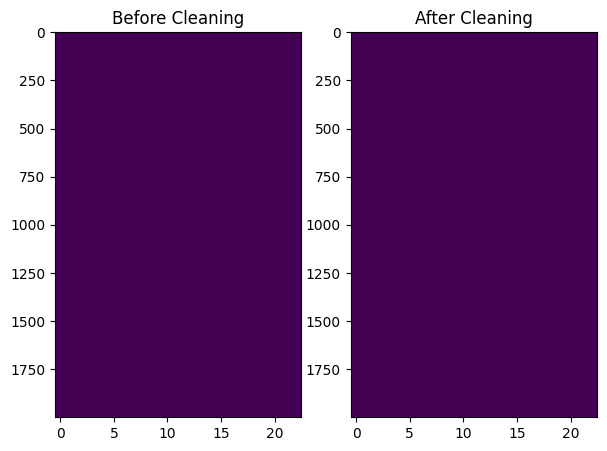

In [ ]:
num_columns=df.select_dtypes(include=['number']).columns
imputer= SimpleImputer(strategy="median")
df[num_columns] = imputer.fit_transform(df[num_columns])  

cat_columns = df.select_dtypes(include=['object']).columns  
df[cat_columns] = df[cat_columns].fillna("Unknown") 

print(df.isnull().sum())  

plt.figure(figsize=(7,5))
plt.subplot(1,2,1)
plt.title("Before Cleaning")
plt.imshow(df.isnull(), aspect="auto", cmap="viridis")

df_cleaned = df.copy()  

plt.subplot(1,2,2)
plt.title("After Cleaning")
plt.imshow(df_cleaned.isnull(), aspect="auto", cmap="viridis")

plt.show()

In [ ]:
df = df[df["Age"] > 0]  
df = df[df["Total_Revenue"] > 0]  
df["Payment_Method"] = df["Payment_Method"].replace("Crypto", "Unknown")  


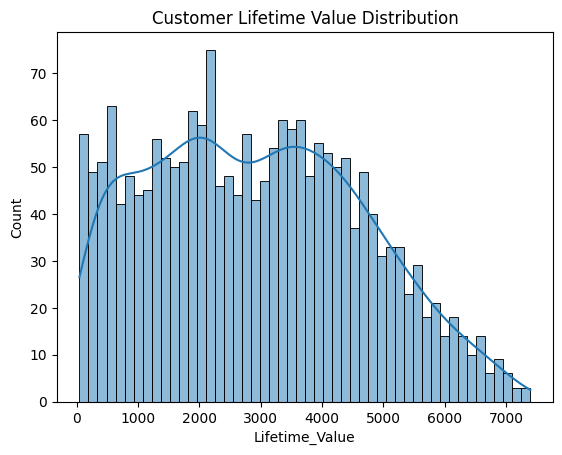

In [18]:
sns.histplot(df["Lifetime_Value"], bins=50, kde=True)
plt.title("Customer Lifetime Value Distribution")
plt.show()


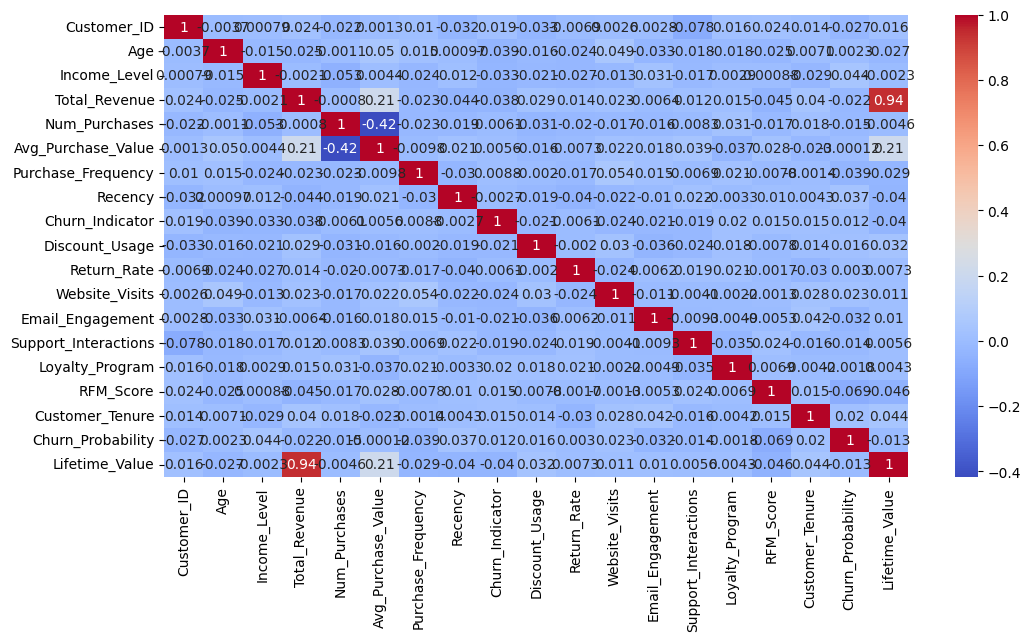

In [22]:
plt.figure(figsize=(12,6))
sns.heatmap(df[num_columns].corr(), annot=True, cmap="coolwarm")
plt.show()